In [1]:
from gridworld import GridworldEnv
from Algorithms.single_q_learning import SingleQLearning
from Algorithms.double_q_learning import DoubleQLearning

import numpy as np
import matplotlib.pyplot as plt
import sys

import time
assert sys.version_info[:3] >= (3, 6, 0), "Make sure you have Python 3.6 installed!"

In [2]:
env = GridworldEnv()

def running_mean(vals, n=1):
    cumvals = np.array(vals).cumsum()
    return (cumvals[n:] - cumvals[:-n]) / n

100%|██████████| 1000/1000 [00:00<00:00, 13858.32it/s]

1000


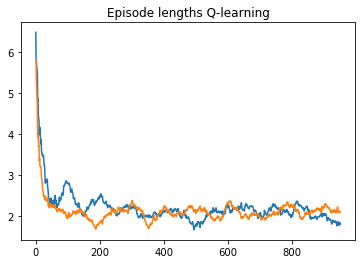

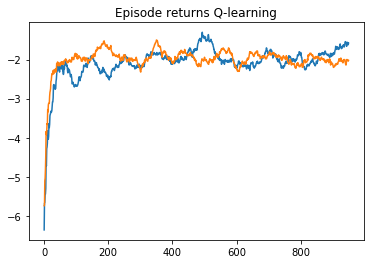

In [4]:
Q_a = np.zeros((env.nS, env.nA))
Q_b = np.zeros((env.nS, env.nA))
policy = DoubleQLearning.EpsilonGreedyPolicy(Q_a, Q_b, epsilon=0.1)
Q_q_learning, (episode_lengths_double_q_learning, episode_returns_double_q_learning) = DoubleQLearning.double_q_learning(env, policy, Q_a, Q_b, 1000)

Q = np.zeros((env.nS, env.nA))
policy = SingleQLearning.EpsilonGreedyPolicy(Q, epsilon=0.1)
Q_q_learning, (episode_lengths_single_q_learning, episode_returns_single_q_learning) = SingleQLearning.single_q_learning(env, policy, Q, 1000)

n = 50

plt.plot(running_mean(episode_lengths_double_q_learning, n))
plt.plot(running_mean(episode_lengths_single_q_learning, n))
plt.title('Episode lengths Q-learning')
plt.show()
plt.plot(running_mean(episode_returns_double_q_learning,n))
plt.plot(running_mean(episode_returns_single_q_learning,n))
plt.title('Episode returns Q-learning')
plt.show()